In [1]:
import numpy as np
import pandas as pd

In [11]:
df1 = pd.read_csv('Lab_3_data.csv')

In [13]:
df1

,Dail 1,Dail 2,Dail 3,Dial 1-Dial 2
0,0,0,0.0,0
1,5,3,2.1,2
2,6,4,5.4,2
3,8,5,8.0,3
4,11,6,12.2,5
5,13,7,16.6,6
6,15,8,19.8,7
7,16,9,22.2,7
8,18,9,24.4,9
9,19,10,26.2,9


In [17]:
df2 = pd.read_csv('lab_3_01.csv')

In [19]:
df2

,Dial 1,Dial 2,Dial 3,Dial 1-Dial 2
0,0,0,0.0,0
1,6,4,5.2,2
2,8,5,10.4,3
3,11,5,18.4,6
4,14,5,25.2,9
5,18,7,35.6,11
6,22,8,43.5,14
7,25,9,50.0,16
8,45,10,63.0,35
9,90,10,66.6,80


In [71]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

class LineGenerator:
    def __init__(self, x, y, x_act, y_act, label, x_label, y_label, title):
        self.x = np.array(x).reshape(-1, 1)  # Ensure x is in the correct shape
        self.y = np.array(y)
        self.x_act = np.array(x_act)
        self.y_act = np.array(y_act)
        self.label = label
        self.x_label = x_label
        self.y_label = y_label
        self.title = title
        self.model = None
        self.slope = None
        self.intercept = None

    def fit(self):
        self.model = LinearRegression()
        self.model.fit(self.x, self.y)

        self.slope = self.model.coef_.flatten()[0]  
        self.intercept = self.model.intercept_.item()  
        print(f"Equation of the best fit line: y = {self.slope}x + {self.intercept}")

    def plot(self):
        if self.model is None:
            raise ValueError("Model is not fitted yet. Call the fit() method first.")

        plt.scatter(self.x, self.y, color='blue', label='Data Points') 
        plt.plot(self.x, self.model.predict(self.x), color='red', label='Best Fit Line') 
        plt.plot(self.x_act, self.y_act, label=self.label, marker='o', linestyle='--') 
        equation_text = f"y = {self.slope:.2f}x + {self.intercept:.2f}"
        plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        plt.title(self.title)
        plt.legend()
        plt.show()



Equation of the best fit line: y = 0.3197411415999257x + 0.3543800887538273


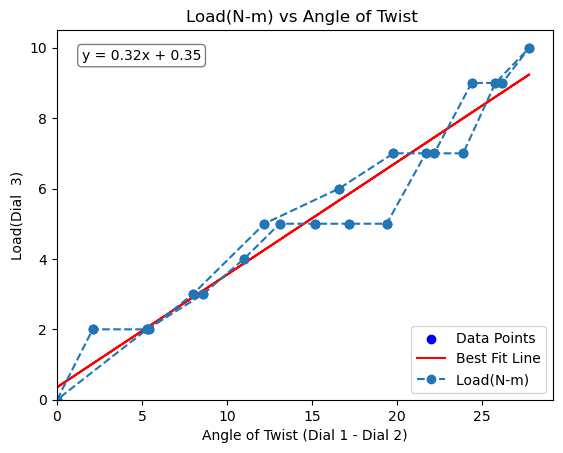

In [73]:
y_act_expV_qr = df1['Dial 1-Dial 2']
x_act_expV_qr = df1['Dail 3']
y_1_expV_qr = np.array(df1['Dial 1-Dial 2']).reshape((-1, 1))
x_1_expV_qr = np.array(df1['Dail 3']).reshape((-1, 1))
label_expV_qr = "Load(N-m) "
x_label_expV_qr = 'Angle of Twist (Dial 1 - Dial 2)'
y_label_expV_qr = 'Load(Dial  3)'
title_expV_qr = 'Load(N-m) vs Angle of Twist '
line_gen2 = LineGenerator(x_1_expV_qr, y_1_expV_qr, x_act_expV_qr, y_act_expV_qr, label_expV_qr, x_label_expV_qr, y_label_expV_qr, title_expV_qr)
line_gen2.fit()
line_gen2.plot()

In [75]:
import matplotlib.pyplot as plt

def generate_plot(experimental_column, load_column, df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df[load_column], df[experimental_column], label='Load (Dial 3)', marker='o', color='b')
    
    plt.xlabel('Angle of Twist ( Dial 1 - Dial 2)')
    plt.ylabel('Load (Dial 3)')
    plt.title(title)

    plt.ylim(bottom=0, top=80)  # Ensures y-axis starts at 0
    plt.xlim(left=0)  # Ensures x-axis starts at 0

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




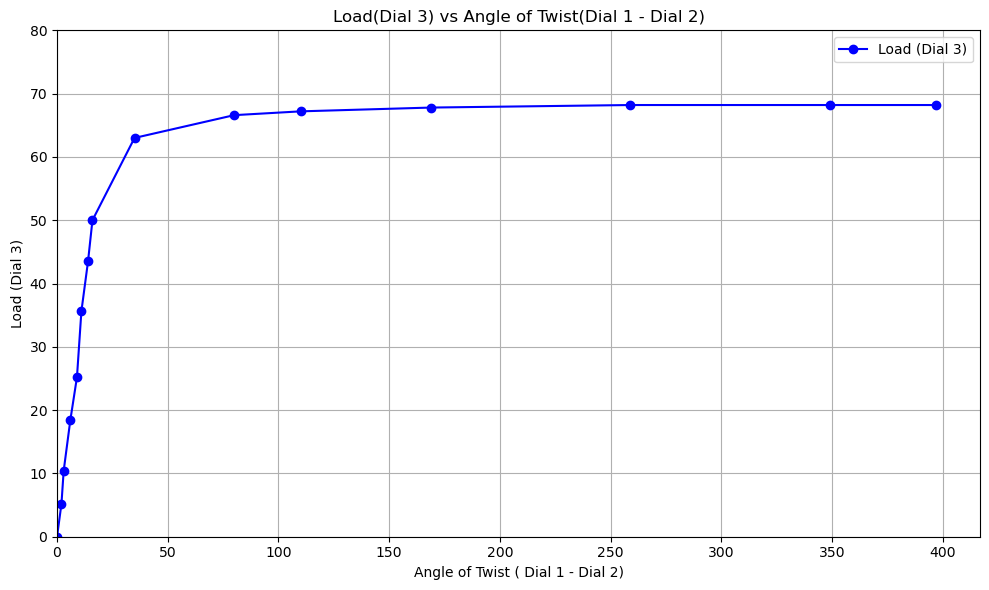

In [77]:
generate_plot('Dial 3','Dial 1-Dial 2',df2,'Load(Dial 3) vs Angle of Twist(Dial 1 - Dial 2)')